# Data Collection - REE API

The objective of this session is to understand how data can be retrieved from specific sources as REE API.

To do so, we will use `requests` library and `json` libraries for Python. These libraries are considered as wrappers. 

Later on, we will use specific libraries for plotting as `matplotlib` and `datetime`. 

In [6]:
# import requests library
import requests 
import json
# import plotting library
import matplotlib
import matplotlib.pyplot as plt 
import datetime

As we have seen before, when we work with APIs, we have to write the endpoint we want to access. 
We need to write also the folder/section we want to access. We can have the same endpoint and different sections from where to get information. 

Most of the times, we need to add some headers to our requests that are required to get the information. The most important one is the **Authorization**, which corresponds to our ID to access that API. 

In [9]:
endpoint = 'https://apidatos.ree.es'
get_archives = '/es/datos/mercados/precios-mercados-tiempo-real'
headers = {"Accept": "application/json",
           "Content-Type": "application/json",
        "Host": "apidatos.ree.es"}
params = {"start_date": "2024-05-14T00:00",
         "end_date": "2024-05-14T23:00",
         "time_trunc": "hour"}

Then, we can write the request according to the requests library and get callable object.

In [16]:
url_completo = endpoint + get_archives
request = requests.get(url=url_completo, headers=headers, params=params)

After that, we can check if the request is correct or not according to the response we get from the API. 

In [17]:
request

<Response [200]>

In this case, the response we get is **200**, meaning that is has been accepted and the connection is established. 
There are different codes that tell us which is our connection status between us and the API. 

In [18]:
status = request.status_code

In [19]:
#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


The data can be accessed by means of a json file. By doing this, we can see all the IDs available for us to obtain data. 

In [20]:
# accessing data by means of a json object
json = request.json()

In [15]:
json

{'data': {'type': 'Precios mercado peninsular en tiempo real',
  'id': 'mer13',
  'attributes': {'title': 'Precios mercado peninsular en tiempo real',
   'last-update': '2024-05-13T20:46:34.000+02:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'MISS'}}},
 'included': [{'type': 'PVPC (€/MWh)',
   'id': '1001',
   'groupId': None,
   'attributes': {'title': 'PVPC (€/MWh)',
    'description': None,
    'color': '#ffcf09',
    'type': None,
    'magnitude': 'price',
    'composite': False,
    'last-update': '2024-05-13T20:46:34.000+02:00',
    'values': [{'value': 60.17,
      'percentage': 0.8442542444226183,
      'datetime': '2024-05-14T00:00:00.000+02:00'},
     {'value': 54.19,
      'percentage': 0.9155262713296165,
      'datetime': '2024-05-14T01:00:00.000+02:00'},
     {'value': 54.75,
      'percentage': 0.929383805805466,
      'datetime': '2024-05-14T02:00:00.000+02:00'},
     {'value': 53.77,
      'percentage': 0.9641384256768872,
      'datetime': '2024

In [21]:
for el in json:
    print(el)

data
included


In [23]:
for el in json["data"]:
    print(el)


type
id
attributes
meta


In [42]:
PVPC = json["included"][0]
values = PVPC["attributes"]["values"]
values[:1]


[{'value': 60.17,
  'percentage': 0.8442542444226183,
  'datetime': '2024-05-14T00:00:00.000+02:00'}]

In [46]:
prices = []
percentage = []
hours = []
for date in values:
    prices.append(date["value"])
    percentage.append(date["percentage"])
    hours.append(date["datetime"])


In [47]:
prices[:3]

[60.17, 54.19, 54.75]

In [48]:
hours[:3]

['2024-05-14T00:00:00.000+02:00',
 '2024-05-14T01:00:00.000+02:00',
 '2024-05-14T02:00:00.000+02:00']

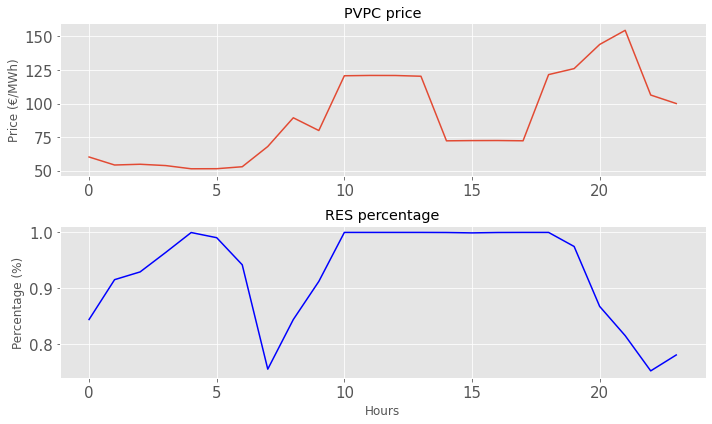

In [63]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rc("xtick", labelsize=15)
matplotlib.rc("ytick", labelsize=15)


fig, ax = plt.subplots(2, 1, figsize=(10,6))
ax[0].plot(prices)
ax[0].set_title("PVPC price")
ax[0].set_ylabel("Price (€/MWh)")

ax[1].plot(percentage,"blue")
ax[1].set_title("RES percentage")
ax[1].set_xlabel("Hours")
ax[1].set_ylabel("Percentage (%)")
plt.tight_layout()

### Final PVPC price

### Day-Ahead Market Clearing Price 

### Percentage of Renewable Energy